In [25]:
%matplotlib inline
#Dummy for small dataset
import pandas as PandaLib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import math as mt
from collections import Counter
import pydotplus
import StringIO
from scipy import misc
from sklearn.tree import export_graphviz
import graphviz

#OpenFile = PandaLib.read_csv('D:/study/Data Analytics\Project_Data_And_Code/Traffic_data.csv')
OpenFile  = PandaLib.read_csv('D:/study/Data Analytics/Project_Data_And_Code/Traffic_data.csv',low_memory='False')
#Remove All the missing values
ConvertToDataFrame = PandaLib.DataFrame(OpenFile)
ConvertToNan1 =ConvertToDataFrame.replace('UU',np.NaN)
ConvertToNan2 =ConvertToNan1.replace('UUUU',np.NaN)
ConvertToNan3 = ConvertToNan2.replace('NN' ,np.NaN)
ConvertToNan4 = ConvertToNan3.replace('NNNN',np.NaN)
ConvertToNan5 = ConvertToNan4.replace('N',np.NaN)
ConvertToNan6 = ConvertToNan5.replace('QQ',np.NaN)
ConvertToNan7 = ConvertToNan6.replace('N',np.NaN)
ConvertToNan8 = ConvertToNan7.replace('U',np.NaN)
ConvertToNan9 = ConvertToNan8.replace('Q',np.NaN)
ConvertToDataFrameFinal = PandaLib.DataFrame(ConvertToNan9)
CLeanedData =ConvertToDataFrameFinal.dropna(axis=0,how='any')
print len(CLeanedData)

CLeanedData['Collision_Month'] = PandaLib.to_numeric(CLeanedData['Collision_Month'])
CLeanedData['Day_of_the_week'] = PandaLib.to_numeric(CLeanedData['Day_of_the_week'])
CLeanedData['Collision_Hour'] = PandaLib.to_numeric(CLeanedData['Collision_Hour'])
CLeanedData['No_of_vehicles_in_collision'] = PandaLib.to_numeric(CLeanedData['No_of_vehicles_in_collision'])
CLeanedData['Collision_Configuration'] = PandaLib.to_numeric(CLeanedData['Collision_Configuration'])
CLeanedData['Roadway_collision'] = PandaLib.to_numeric(CLeanedData['Roadway_collision'])
CLeanedData['Roadway_collision'] = PandaLib.to_numeric(CLeanedData['Roadway_collision'])
CLeanedData['weather_condition'] = PandaLib.to_numeric(CLeanedData['weather_condition'])
CLeanedData['Road_Surface'] = PandaLib.to_numeric(CLeanedData['Road_Surface'])
CLeanedData['Road_Alignment'] = PandaLib.to_numeric(CLeanedData['Road_Alignment'])
CLeanedData['Traffic_control'] = PandaLib.to_numeric(CLeanedData['Traffic_control'])
CLeanedData['Vehicle_Type'] = PandaLib.to_numeric(CLeanedData['Vehicle_Type'])
CLeanedData['Vehicle_Year_ Model'] = PandaLib.to_numeric(CLeanedData['Vehicle_Year_ Model'])
CLeanedData['Person_ID'] = PandaLib.to_numeric(CLeanedData['Person_ID'])
CLeanedData['Person_Age'] = PandaLib.to_numeric(CLeanedData['Person_Age'])
CLeanedData['Person_Position'] = PandaLib.to_numeric(CLeanedData['Person_Position'])
CLeanedData['Medical_Treatment_required'] = PandaLib.to_numeric(CLeanedData['Medical_Treatment_required'])
CLeanedData['Safety_Device_Required'] = PandaLib.to_numeric(CLeanedData['Safety_Device_Required'])
CLeanedData['Road_User_Class'] = PandaLib.to_numeric(CLeanedData['Road_User_Class'])

TrainingData, TestingData = train_test_split(CLeanedData, test_size=0.3)


166317


C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [26]:
print TrainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116421 entries, 186022 to 161132
Data columns (total 22 columns):
Year                           116421 non-null int64
Collision_Month                116421 non-null int64
Day_of_the_week                116421 non-null int64
Collision_Hour                 116421 non-null int64
Collision_Severe               116421 non-null int64
No_of_vehicles_in_collision    116421 non-null int64
Collision_Configuration        116421 non-null int64
Roadway_collision              116421 non-null int64
weather_condition              116421 non-null int64
Road_Surface                   116421 non-null int64
Road_Alignment                 116421 non-null int64
Traffic_control                116421 non-null int64
Vehicle_ ID                    116421 non-null object
Vehicle_Type                   116421 non-null int64
Vehicle_Year_ Model            116421 non-null int64
Person_ID                      116421 non-null int64
Person_Sex                     1164

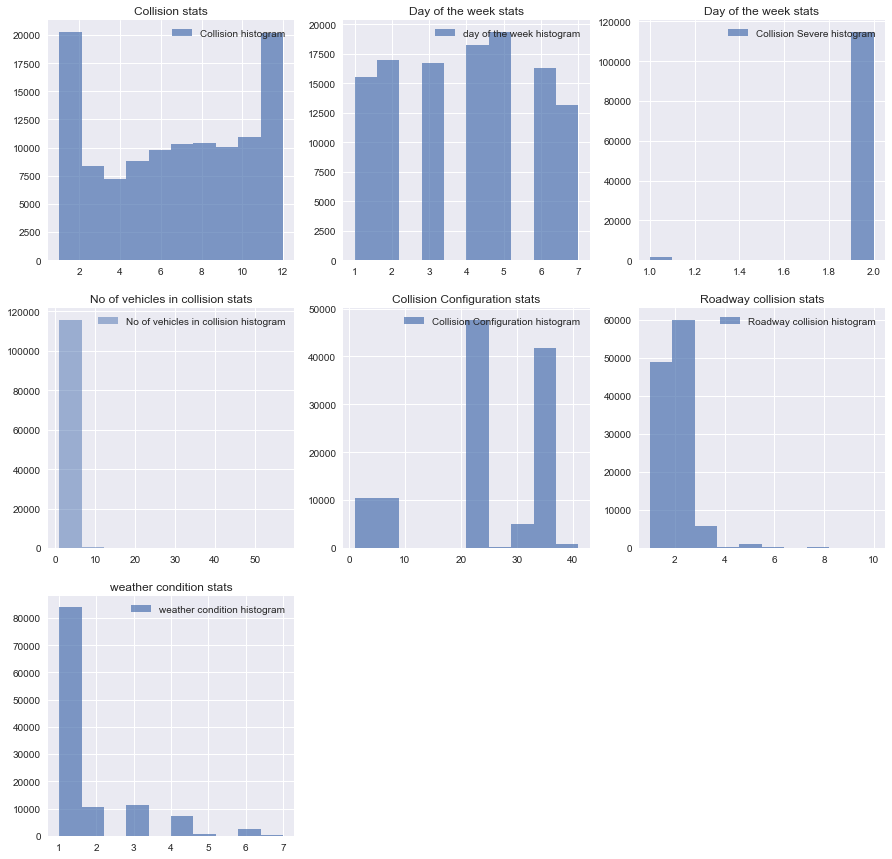

In [27]:
#Visualize data
#collision monthwise
fig = plt.figure(figsize=(15,15))
FirstGraph = fig.add_subplot(331)
FirstGraph.set_title("Collision stats")
Collision_Data = TrainingData['Collision_Month']
Collision_Data.hist(alpha=0.7,label = 'Collision histogram')
FirstGraph.legend(loc='upper right')

#Day Of the week
SecondGraph = fig.add_subplot(332)
SecondGraph.set_title("Day of the week stats")
WeekDay_Data = TrainingData['Day_of_the_week']
WeekDay_Data.hist(alpha=0.7,label = 'day of the week histogram')
SecondGraph.legend(loc='upper right')

#Collision_Severity
ThirdGraph = fig.add_subplot(333)
ThirdGraph.set_title("Day of the week stats")
Collision_Severity = TrainingData['Collision_Severe']
Collision_Severity.hist(alpha=0.7,label = 'Collision Severe histogram')
ThirdGraph.legend(loc='upper right')

#No of vehicles in collision
ForthGraph = fig.add_subplot(334)
ForthGraph.set_title("No of vehicles in collision stats")
No_of_vehicles_in_collision = TrainingData['No_of_vehicles_in_collision']
No_of_vehicles_in_collision.hist(alpha=0.5,label = 'No of vehicles in collision histogram')
ForthGraph.legend(loc='upper right')

#Collision Configuration
FifthGraph = fig.add_subplot(335)
FifthGraph.set_title("Collision Configuration stats")
Collision_Configuration = TrainingData['Collision_Configuration']
Collision_Configuration.hist(alpha=0.7,label = 'Collision Configuration histogram')
FifthGraph.legend(loc='upper right')

#Roadway collision
SixthGraph = fig.add_subplot(336)
SixthGraph.set_title("Roadway collision stats")
Roadway_collision = TrainingData['Roadway_collision']
Roadway_collision.hist(alpha=0.7,label = 'Roadway collision histogram')
SixthGraph.legend(loc='upper right')

#weather condition
SeventhGraph = fig.add_subplot(337)
SeventhGraph.set_title("weather condition stats")
weather_condition = TrainingData['weather_condition']
weather_condition.hist(alpha=0.7,label = 'weather condition histogram')
SeventhGraph.legend(loc='upper right')

#Day Of the week
 SecondGraph = fig.add_subplot(338)
# SecondGraph.set_title("Day of the week stats")
# WeekDay_Data = TrainingData['Day_of_the_week']
# WeekDay_Data.hist(alpha=0.7,label = 'day of the week histogram')
# SecondGraph.legend(loc='upper right')

# #Day Of the week
# SecondGraph = fig.add_subplot(339)
# SecondGraph.set_title("Day of the week stats")
# WeekDay_Data = TrainingData['Day_of_the_week']
# WeekDay_Data.hist(alpha=0.7,label = 'day of the week histogram')
# SecondGraph.legend(loc='upper right')

# #Day Of the week
# SecondGraph = fig.add_subplot(341)
# SecondGraph.set_title("Day of the week stats")
# WeekDay_Data = TrainingData['Day_of_the_week']
# WeekDay_Data.hist(alpha=0.7,label = 'day of the week histogram')
# SecondGraph.legend(loc='upper right')

# #Day Of the week
# SecondGraph = fig.add_subplot(311)
# SecondGraph.set_title("Day of the week stats")
# WeekDay_Data = TrainingData['Day_of_the_week']
# WeekDay_Data.hist(alpha=0.7,label = 'day of the week histogram')
# SecondGraph.legend(loc='upper right')




In [28]:
#Decision tree part

Split_The_data = tree.DecisionTreeClassifier(min_samples_split = 10)
Features = ['Collision_Month','Day_of_the_week','Collision_Severe','No_of_vehicles_in_collision','Collision_Configuration','Roadway_collision']
X_train = TrainingData[Features]
Y_train = TrainingData['weather_condition']

X_test = TestingData[Features]
Y_test = TestingData['weather_condition']

DecisionTree = Split_The_data.fit(X_train,Y_train)

def show_tree(tree,features,path):  
    f = StringIO.StringIO()
    export_graphviz(tree,out_file=f,feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = [20,20]
    plt.imshow(img)
#show_tree(DecisionTree,features,'sample1.png')

Prediction_Model = Split_The_data.predict(X_train)



In [31]:
from sklearn.metrics import accuracy_score

score =accuracy_score(Y_train,Prediction_Model)
print "Train score is " + str(score*100)


#now applying the same for test data
Prediction_Model_For_Test = Split_The_data.predict(X_test)
score_test = accuracy_score(Y_test,Prediction_Model_For_Test)
print "Test score is " + str(score_test*100)

Train score is 75.0612002989
Test score is 73.1822190156
